In [1]:
!pip install transformers
!pip install torch
!pip install sentencepiece
!pip install PyPDF2
!pip install pycryptodome

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import torch
from transformers import T5Tokenizer, T5ForConditionalGeneration
from PyPDF2 import PdfReader

In [3]:
tokenizer = T5Tokenizer.from_pretrained("t5-small")
model = T5ForConditionalGeneration.from_pretrained("t5-small")
device = torch.device('cpu')

/usr/local/lib/python3.8/dist-packages/transformers/models/t5/tokenization_t5.py:163: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-small automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


In [54]:
path = "/content/Offer Package _ Arya Shahvar _ 2206074765W _ ref__00D1aJXkC._5001P1U3Pnh_ref_encrypted_ (1).pdf"
text = ""
with open(path, 'rb') as f:
  pdf = PdfReader(f)
  pages = pdf.pages
  for p in range(3, 11):
    txt = pages[p].extract_text()
    text += txt
  # text = pages[3].extract_text()
text

'{{#d=*Sig_es_:signer2:signature: dimension(width=64mm, height=10mm):font(size=14)}}  \n{{#e=*N_es_:signer2:fullname: dimension(width=64mm, height=10mm):font(size=14)}}  \n{{#f=Dte_es_:signer2:date: dimension(width=64mm, height=10mm):font(size=14)}}  \n{{#g=*N1_es_:signer2:dimension(width=64mm, height=10mm):font(size=14)}}  \n{{#h=*N2_es_:signer2:dimension(width=64mm, height=10mm) :font(size=14)}}  \n \n \nEMPLOYEE SECRECY, INTELLECTUAL PROPERTY  \nAND NON -SOLICITATION AGREEMENT  \n \n \nName of Employee:  Arya Shahvar  \n Janssen Research & Development, LLC  (the “EMPLOYER”) is one of numerous \nentities within the Johnson & Johnson Family of  Companies ( individually and/or collectively, \nthe “COMPANY”).  The businesses in which the COMPANY is engaged are extremely competitive. \nYour role involves a position of trust and confidence in which you will have access to \nconfidential, proprietary, and s ecret information, the disclosure of which would cause the \nCOMPANY to suffer subs

In [55]:
MAX_TOKENS = 1024
preprocess_text = text.strip().replace("\n","")
t5_prepared_Text = "summarize: "+preprocess_text
print ("original text preprocessed: \n", preprocess_text)

tokenized_text = tokenizer.encode(t5_prepared_Text, return_tensors="pt", max_length=MAX_TOKENS, truncation=True)

original text preprocessed: 
 {{#d=*Sig_es_:signer2:signature: dimension(width=64mm, height=10mm):font(size=14)}}  {{#e=*N_es_:signer2:fullname: dimension(width=64mm, height=10mm):font(size=14)}}  {{#f=Dte_es_:signer2:date: dimension(width=64mm, height=10mm):font(size=14)}}  {{#g=*N1_es_:signer2:dimension(width=64mm, height=10mm):font(size=14)}}  {{#h=*N2_es_:signer2:dimension(width=64mm, height=10mm) :font(size=14)}}    EMPLOYEE SECRECY, INTELLECTUAL PROPERTY  AND NON -SOLICITATION AGREEMENT    Name of Employee:  Arya Shahvar   Janssen Research & Development, LLC  (the “EMPLOYER”) is one of numerous entities within the Johnson & Johnson Family of  Companies ( individually and/or collectively, the “COMPANY”).  The businesses in which the COMPANY is engaged are extremely competitive. Your role involves a position of trust and confidence in which you will have access to confidential, proprietary, and s ecret information, the disclosure of which would cause the COMPANY to suffer substanti

In [29]:
summary_ids = model.generate(tokenized_text,
                                    num_beams=4,
                                    no_repeat_ngram_size=2,
                                    # min_length=200,
                                    max_length=1024,
                                    early_stopping=True)

output = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

print ("\n\nSummarized text: \n",output)



Summarized text: 
 you will disclose promptly in writing to your EMPLOYER or its designee all INVENTIONS conceived, created and/or reduced to practice by you during your hours of employment. you agree to assign and assign your entire right, title and interest in all such INventIONS (including, but not limited to, all related patent applications and all priority rights relating to any INventions or related applications) if used or diverted to benefit a competitor, the COMPANY would suffer substantial and irreparable harm.


In [30]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image


In [34]:
stop_w = set(STOPWORDS)

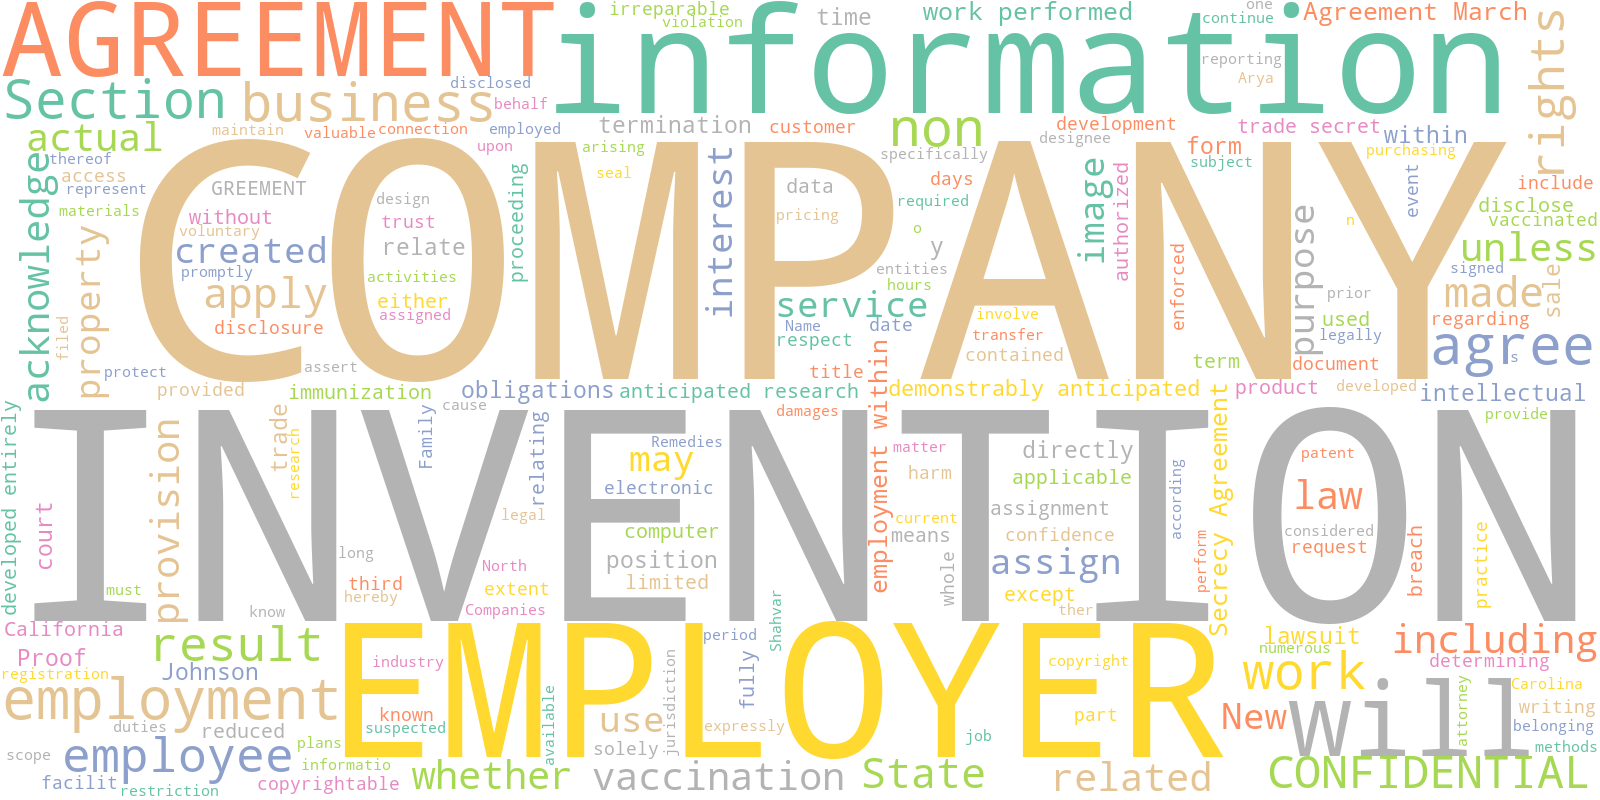

In [56]:
filter = " ".join([word for word in text.split() if word.isalpha()])
filtered2 = WordCloud(stopwords=stop_w, width=1600, height=800, background_color="white", colormap="Set2").generate(filter)
img = filtered2.to_image()

display(img)

In [57]:
import collections
filter = [word for word in text.split() if word not in stop_w and word.isalpha()]
counted = collections.Counter(filter)
counted.most_common()

[('COMPANY', 32),
 ('EMPLOYER', 19),
 ('employment', 18),
 ('AGREEMENT', 16),
 ('will', 15),
 ('information', 15),
 ('You', 13),
 ('INVENTION', 13),
 ('For', 12),
 ('work', 12),
 ('within', 11),
 ('business', 11),
 ('agree', 11),
 ('Section', 10),
 ('trade', 9),
 ('rights', 9),
 ('Agreement', 8),
 ('made', 8),
 ('apply', 8),
 ('non', 8),
 ('whether', 7),
 ('related', 7),
 ('actual', 7),
 ('anticipated', 7),
 ('performed', 7),
 ('including', 7),
 ('result', 6),
 ('created', 6),
 ('use', 6),
 ('assign', 6),
 ('Secrecy', 6),
 ('March', 6),
 ('unless', 6),
 ('developed', 6),
 ('CONFIDENTIAL', 6),
 ('law', 6),
 ('may', 6),
 ('A', 6),
 ('Johnson', 5),
 ('position', 5),
 ('In', 5),
 ('directly', 5),
 ('research', 5),
 ('secret', 5),
 ('obligations', 5),
 ('INVENTIONS', 5),
 ('demonstrably', 5),
 ('time', 5),
 ('lawsuit', 5),
 ('acknowledge', 5),
 ('YOU', 5),
 ('vaccination', 5),
 ('AND', 4),
 ('used', 4),
 ('y', 4),
 ('purposes', 4),
 ('means', 4),
 ('disclose', 4),
 ('reduced', 4),
 ('limite